In [6]:
import json
import pandas as pd
import os

def jsonl_to_dataframe(directory):
    data = []
    for filename in os.listdir(directory):
        print(filename)
        if filename.endswith('.json'):
            with open(os.path.join(directory, filename), 'r') as file:
                for line in file:
                    data.append(json.loads(line))
    return pd.DataFrame(data)

In [7]:
# Get the dataset here: https://github.com/openai/summarize-from-feedback

In [8]:
dataset = jsonl_to_dataframe('/users/lucelo/reddit-cnn-dataset/comparisons')

batch0_cnndm.json
batch10.json
batch11.json
batch12.json
batch13.json
batch14.json
batch15.json
batch16.json
batch17.json
batch18.json
batch19.json
batch20.json
batch22.json
batch3.json
batch4.json
batch5.json
batch6.json
batch7.json
batch8.json
batch9.json
cnndm0.json
cnndm2.json
edit_b2_eval_test.json


In [9]:
train = dataset[dataset["split"] == "train"].reset_index(drop=True)

In [10]:
train.head()

,info,split,summaries,choice,worker,batch,extra
0,"{'id': 't3_f2bvu', 'post': 'A little backgroun...",train,[{'text': ' My name wasn't on the list for a l...,1,M4bdOszgybjO2qg2Dth5I1GOYAvE7V,batch10,{'confidence': 8}
1,"{'id': 't3_f2bvu', 'post': 'A little backgroun...",train,[{'text': ' A math class had us sign up for a ...,1,M4bdOszgybjO2qg2Dth5I1GOYAvE7V,batch10,{'confidence': 9}
2,"{'id': 't3_f2bvu', 'post': 'A little backgroun...",train,"[{'text': ' Unbeknownst to me, my self assigne...",1,M4bdOszgybjO2qg2Dth5I1GOYAvE7V,batch10,{'confidence': 6}
3,"{'id': 't3_f2bvu', 'post': 'A little backgroun...",train,[{'text': ' My name wasn't on the list for a l...,1,M4bdOszgybjO2qg2Dth5I1GOYAvE7V,batch10,{'confidence': 9}
4,"{'id': 't3_f2bvu', 'post': 'A little backgroun...",train,"[{'text': ' Unbeknownst to me, my self assigne...",1,M4bdOszgybjO2qg2Dth5I1GOYAvE7V,batch10,{'confidence': 9}


In [11]:
def process_dataframe(df, keyword='post'):
    # Initialize lists to store the new columns
    post_list = []
    text_first_list = []
    text_second_list = []
    choice_list = []

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Extract 'post' from 'info' column (assuming it's a string of a JSON object)
        info_json = row['info']
        post = info_json.get(keyword, '')

        # Extract texts from 'summaries' column (assuming it's a string of a JSON array)
        summaries_json = row['summaries']
        text_first = summaries_json[0].get('text', '') if len(summaries_json) > 0 else ''
        text_second = summaries_json[1].get('text', '') if len(summaries_json) > 1 else ''

        # Get 'choice' value
        choice = row['choice']

        # Append the values to the lists
        post_list.append(post)
        text_first_list.append(text_first)
        text_second_list.append(text_second)
        choice_list.append(choice)

    # Create a new DataFrame
    new_df = pd.DataFrame({
        'Post': post_list,
        'Text_First': text_first_list,
        'Text_Second': text_second_list,
        'Choice': choice_list
    })

    return new_df

In [12]:
def select_chosen_rejected(df):
    # Initialize lists to store the new columns
    post_list = []
    chosen_list = []
    rejected_list = []

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Get 'Post' value
        post = row['Post']

        # Get 'Chosen' and 'Rejected' values based on 'Choice'
        if row['Choice'] == 0:
            chosen = row['Text_First']
            rejected = row['Text_Second']
        else:
            chosen = row['Text_Second']
            rejected = row['Text_First']

        # Append the values to the lists
        post_list.append(post)
        chosen_list.append(chosen)
        rejected_list.append(rejected)

    # Create a new DataFrame
    new_df = pd.DataFrame({
        'post': post_list,
        'chosen_summary': chosen_list,
        'rejected_summary': rejected_list
    })

    return new_df

In [13]:
new_df = process_dataframe(train)

In [14]:
final_train_df = select_chosen_rejected(new_df)

In [15]:
final_train_df.head()

,post,chosen_summary,rejected_summary
0,A little background first. Like most engineers...,A math class had us sign up for a lab group b...,My name wasn't on the list for a lab. As such...
1,A little background first. Like most engineers...,I accidentally discovered that my university ...,A math class had us sign up for a lab group b...
2,A little background first. Like most engineers...,My name wasn't on the list for a lab. As such...,"Unbeknownst to me, my self assigned homework ..."
3,A little background first. Like most engineers...,I accidentally discovered that my university ...,My name wasn't on the list for a lab. As such...
4,A little background first. Like most engineers...,I accidentally discovered that my university ...,"Unbeknownst to me, my self assigned homework ..."


In [16]:
valid1 = dataset[dataset["split"] == "valid1"]

In [17]:
valid1_processed_df = process_dataframe(valid1)

In [18]:
final_valid1_df = select_chosen_rejected(valid1_processed_df)

In [19]:
final_valid1_df.head()

,post,chosen_summary,rejected_summary
0,This is my first post so please be kind :)\n\n...,"I never dated/flirted as an adult, now I'm no...","Just came out of 8 year relationship, don't k..."
1,This is my first post so please be kind :)\n\n...,"Just came out of 8 year relationship, don't k...",Don't know how to date/flirt/flirt with someo...
2,This is my first post so please be kind :)\n\n...,"I never dated/flirted as an adult, now I'm no...",Don't know how to date/flirt/flirt with someo...
3,This is my first post so please be kind :)\n\n...,"Just came out of 8 year relationship, don't k...",Started a long-term relationship as a teenage...
4,This is my first post so please be kind :)\n\n...,Started a long-term relationship as a teenage...,Don't know how to date/flirt/flirt with someo...


In [20]:
valid2 = dataset[dataset["split"] == "valid2"]

In [21]:
valid2_cnn = valid2[valid2["batch"].str.contains("cnndm")]

In [22]:
valid2_reddit = valid2[~valid2["batch"].str.contains("cnndm")]

In [23]:
len(valid2_reddit), len(valid2_cnn)

(50719, 2284)

In [24]:
valid2_reddit_new = process_dataframe(valid2_reddit)

In [25]:
final_valid2_reddit_df = select_chosen_rejected(valid2_reddit_new)

In [26]:
final_valid2_reddit_df.head()

,post,chosen_summary,rejected_summary
0,So this week we had plans to hang out on Sunda...,Girl I've been with 2 dates flaked out on pla...,"Had plans to hang out with girl this week, bu..."
1,So this week we had plans to hang out on Sunda...,"Had two great dates this week, flaked out on ...","Had plans to hang out with girl this week, bu..."
2,So this week we had plans to hang out on Sunda...,Girl I've been with 2 dates flaked out on pla...,"Had plans with girl, schedule changed, she sc..."
3,So this week we had plans to hang out on Sunda...,"Had plans with girl, schedule changed, she sc...","Had plans to hang out with girl this week, bu..."
4,So this week we had plans to hang out on Sunda...,"Had two great dates this week, flaked out on ...","Had plans with girl, schedule changed, she sc..."


In [27]:
valid2_cnn_new = process_dataframe(valid2_cnn, "article")

In [28]:
final_valid2_cnn_df = select_chosen_rejected(valid2_cnn_new)

In [29]:
final_valid2_cnn_df.head()

,post,chosen_summary,rejected_summary
0,Max Clifford has been arrested in connection w...,Max Clifford 'arrested in connection with all...,"Police have arrested Max Clifford, a PR guru,..."
1,Max Clifford has been arrested in connection w...,Disgraced PR guru Max Clifford has been arres...,"Police have arrested Max Clifford, a PR guru,..."
2,Max Clifford has been arrested in connection w...,Max Clifford 'arrested in connection with all...,71-year-old Max Clifford has been arrested in...
3,Max Clifford has been arrested in connection w...,Max Clifford 'arrested in connection with all...,Disgraced PR guru Max Clifford has been arres...
4,Max Clifford has been arrested in connection w...,71-year-old Max Clifford has been arrested in...,"Police have arrested Max Clifford, a PR guru,..."


In [71]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, BitsAndBytesConfig, HfArgumentParser, TrainerCallback
tokenizer = AutoTokenizer.from_pretrained("gpt2", trust_remote_code=True, truncation=True, max_length=512)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"  # Fix weird overflow issue with fp16 training
import matplotlib.pyplot as plt
def count_tokens(df):
    posts, chosens, rejecteds = [], [], []
    for idx, example in df.iterrows():
        post_tokens = tokenizer(example["post"])
        chosen_tokens = tokenizer(example["chosen_summary"])
        rejected_tokens = tokenizer(example["rejected_summary"])
        posts.append(len(post_tokens['input_ids']))
        chosens.append(len(chosen_tokens['input_ids']))
        rejecteds.append(len(rejected_tokens['input_ids']))
    # plt.hist(posts, label="posts")
    plt.hist(chosens, label="chosens", bins=70)
    plt.hist(rejecteds, label="rejecteds", bins=70)
    plt.legend()

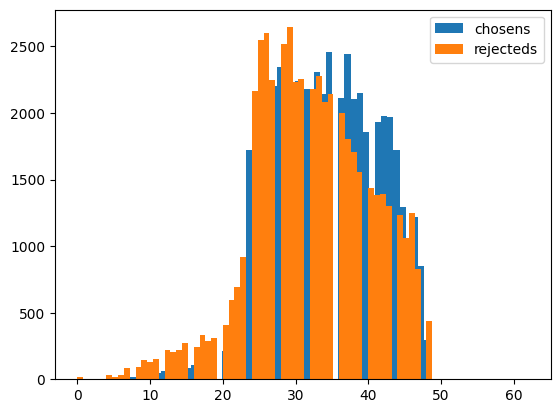

In [73]:
count_tokens(final_valid2_reddit_df)

In [25]:
import csv
final_train_df.to_csv("train.csv", index=True, header=True, index_label="id", quoting=csv.QUOTE_ALL)
final_valid1_df.to_csv("valid1.csv", index=True, header=True, index_label="id", quoting=csv.QUOTE_ALL)
final_valid2_reddit_df.to_csv("valid2_reddit.csv", index=True, header=True, index_label="id", quoting=csv.QUOTE_ALL)
final_valid2_cnn_df.to_csv("valid2_cnn.csv", index=True, header=True, index_label="id", quoting=csv.QUOTE_ALL)